# Algorithm Performance Data Analysis - Run 1

In [15]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data

## first test data 
data = pd.read_csv('IndividualCompressionData_since_test_20231031_122744.csv')

In [2]:
# Inspect the data
data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231031_122746,10404007.png,502730,408267,94463,0.187900,15,19,61265,42484,18781,0.306553,12.925772,958.902267,18.313060,50,0.011
1,2,test_20231031_122746,1254659.png,342646,285422,57224,0.167006,12,13,80080,35428,44652,0.557592,8.052427,498.821579,21.151351,50,0.011
2,3,test_20231031_122746,10188041.png,221231,49777,171454,0.775000,7,21,41731,6792,34939,0.837243,6.245426,297.691776,23.393135,50,0.011
3,4,test_20231031_122746,10287332.png,216980,45777,171203,0.789027,7,12,22337,6144,16193,0.724941,7.113189,361.061456,22.554992,50,0.011
4,5,test_20231031_122746,11610969.png,368720,205712,163008,0.442092,12,13,84111,28216,55895,0.664539,9.084441,554.421269,20.692405,50,0.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,6,test_20231031_123040,10350842.png,212614,24,212590,0.999887,1,6,42529,1,42528,0.999976,55.226706,11938.014080,7.361483,200,0.091
1586,7,test_20231031_123040,10863862.png,317432,24,317408,0.999924,1,6,66058,1,66057,0.999985,55.749476,12668.007861,7.103720,200,0.091
1587,8,test_20231031_123040,11382381.png,312486,24,312462,0.999923,1,6,46745,1,46744,0.999979,30.521228,5261.919984,10.919361,200,0.091
1588,9,test_20231031_123040,11079715.png,443815,24,443791,0.999946,1,6,124136,1,124135,0.999992,73.080213,22147.381120,4.677580,200,0.091


## Analyze per Image

In [4]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [5]:
singe_image_data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231031_122746,10404007.png,502730,408267,94463,0.187900,15,19,61265,42484,18781,0.306553,12.925772,958.902267,18.313060,50,0.011
10,1,test_20231031_122748,10404007.png,502730,396882,105848,0.210546,11,10,61265,41596,19669,0.321048,13.132884,989.808112,18.175294,50,0.021
20,1,test_20231031_122750,10404007.png,502730,391737,110993,0.220781,14,10,61265,41119,20146,0.328834,13.256704,1010.479669,18.085528,50,0.031
30,1,test_20231031_122751,10404007.png,502730,380682,122048,0.242770,15,12,61265,40127,21138,0.345026,13.496007,1053.336523,17.905132,50,0.041
40,1,test_20231031_122753,10404007.png,502730,367519,135211,0.268954,11,9,61265,39014,22251,0.363193,13.836199,1108.462475,17.683594,50,0.051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,1,test_20231031_123035,10404007.png,502730,24,502706,0.999952,1,6,61265,1,61264,0.999984,31.611186,5234.651008,10.941926,200,0.051
1550,1,test_20231031_123037,10404007.png,502730,24,502706,0.999952,1,6,61265,1,61264,0.999984,31.611186,5234.651008,10.941926,200,0.061
1560,1,test_20231031_123038,10404007.png,502730,24,502706,0.999952,1,7,61265,1,61264,0.999984,31.611186,5234.651008,10.941926,200,0.071
1570,1,test_20231031_123039,10404007.png,502730,24,502706,0.999952,1,8,61265,1,61264,0.999984,31.611186,5234.651008,10.941926,200,0.081


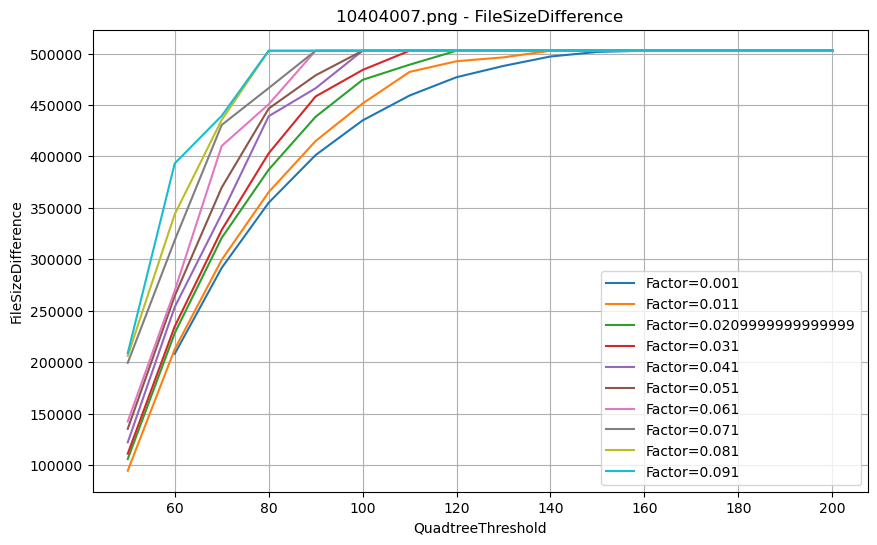

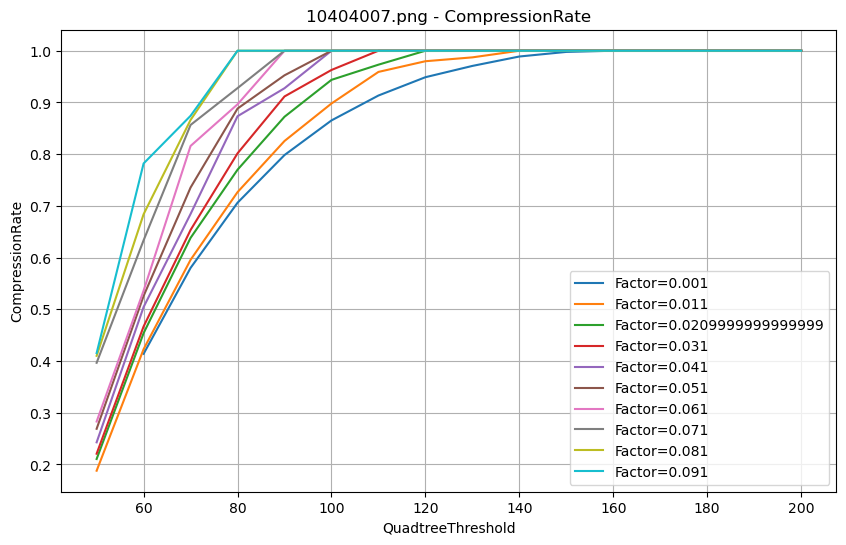

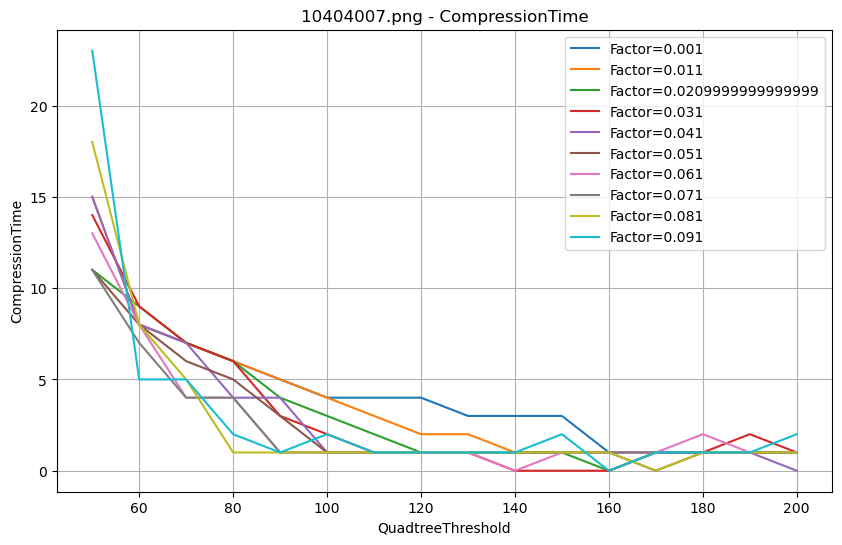

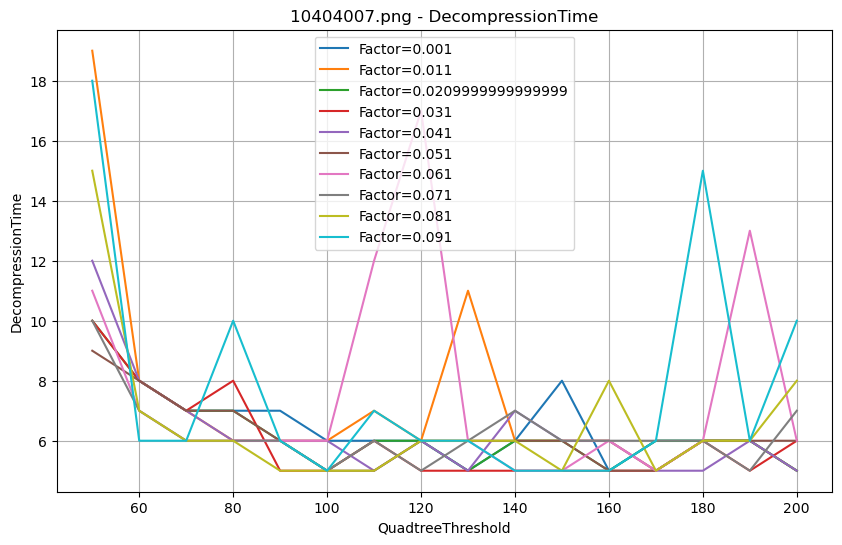

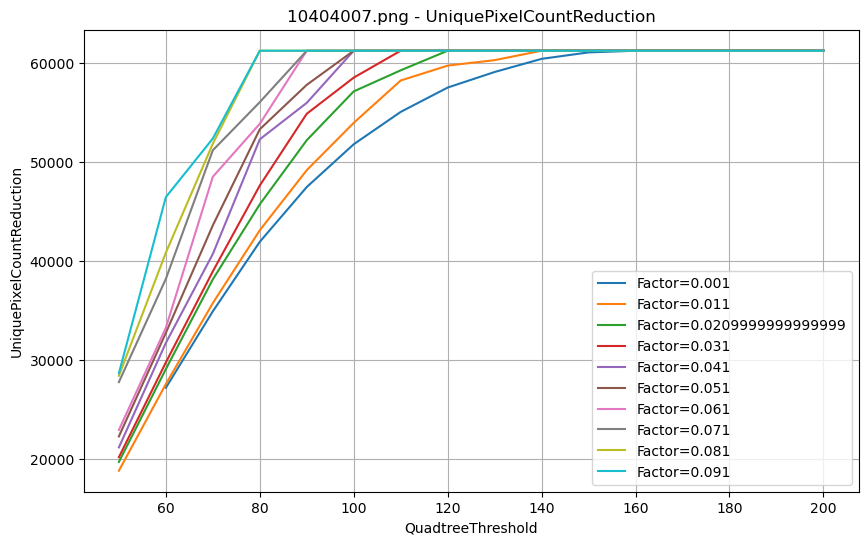

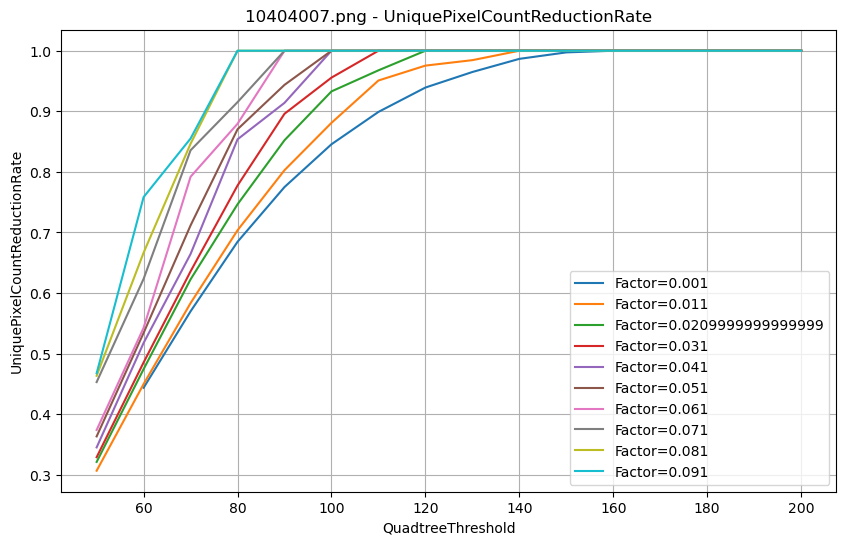

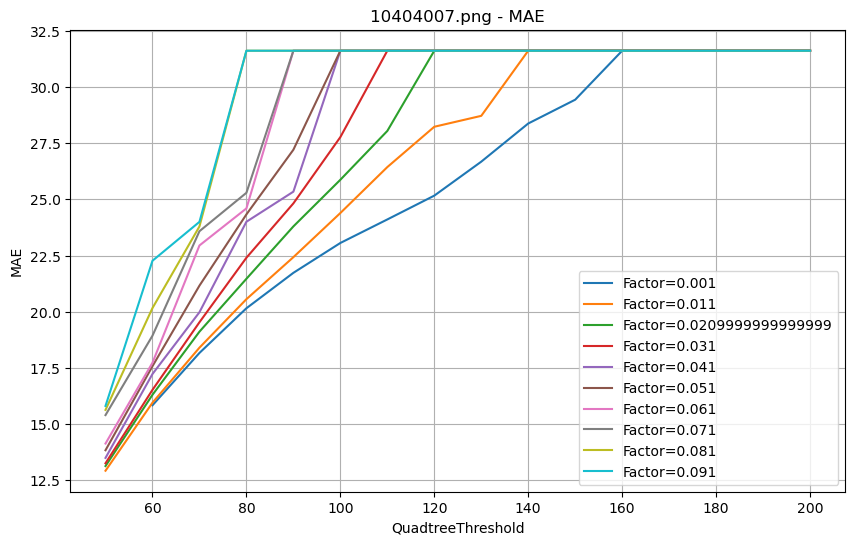

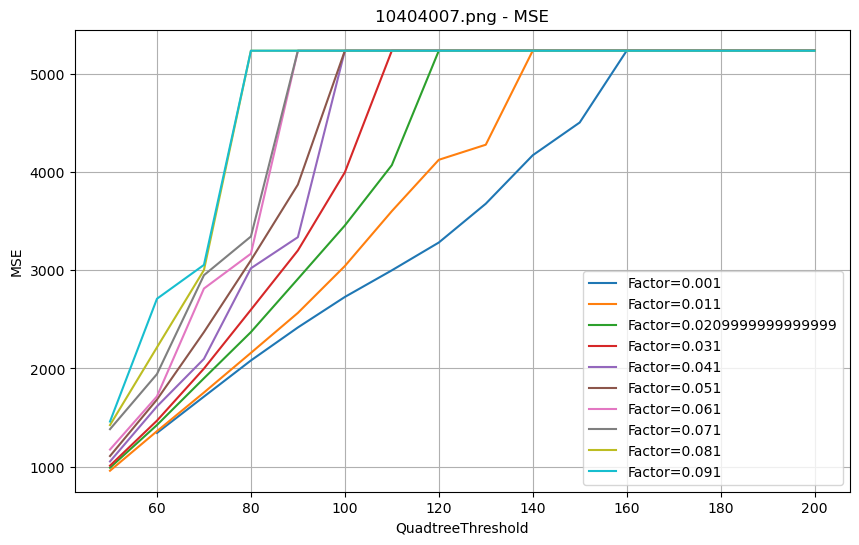

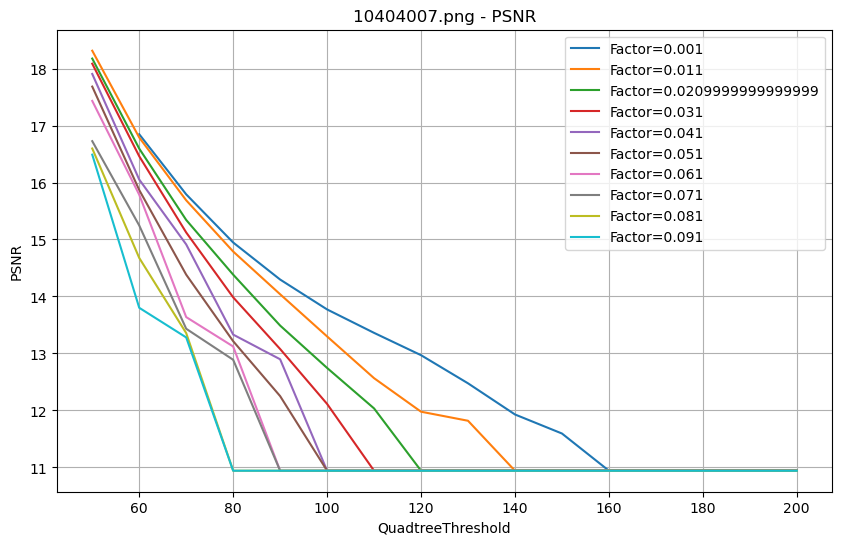

In [6]:
# List of metrics interested in
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# Create a separate plot for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Group by AllowedExceedingThresholdFactor and plot
    for key, sub_group in singe_image_data.groupby('AllowedExceedingThresholdFactor'):
        plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
    plt.title(f'{image_name} - {metric}')
    plt.xlabel('QuadtreeThreshold')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()


## Analyze per Test

In [7]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_5829/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [8]:
data_grouped_by_test

,TestID,QuadtreeThreshold,AllowedExceedingThresholdFactor,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR
0,test_20231031_122746,50,0.011,5.5,321053.7,168595.5,152458.2,0.544983,9.6,14.0,60908.4,21127.7,39780.7,0.695870,8.705095,504.823737,21.314418
1,test_20231031_122748,50,0.021,5.5,321053.7,162639.1,158414.6,0.563371,7.2,10.1,60908.4,20433.9,40474.5,0.709073,9.007585,544.865806,20.944409
2,test_20231031_122750,50,0.031,5.5,321053.7,160170.7,160883.0,0.571104,8.0,9.4,60908.4,20130.3,40778.1,0.714901,9.308726,586.188802,20.604501
3,test_20231031_122751,50,0.041,5.5,321053.7,154067.9,166985.8,0.590446,7.9,9.2,60908.4,19375.4,41533.0,0.728883,9.859583,682.642887,19.878763
4,test_20231031_122753,50,0.051,5.5,321053.7,148248.0,172805.7,0.607708,7.0,8.2,60908.4,18688.7,42219.7,0.741098,10.210574,738.893695,19.524418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,test_20231031_123035,200,0.051,5.5,321053.7,24.0,321029.7,0.999919,1.5,7.7,60908.4,1.0,60907.4,0.999980,51.105148,12404.322642,8.068942
155,test_20231031_123037,200,0.061,5.5,321053.7,24.0,321029.7,0.999919,1.0,7.1,60908.4,1.0,60907.4,0.999980,51.105148,12404.322642,8.068942
156,test_20231031_123038,200,0.071,5.5,321053.7,24.0,321029.7,0.999919,1.2,6.0,60908.4,1.0,60907.4,0.999980,51.105148,12404.322642,8.068942
157,test_20231031_123039,200,0.081,5.5,321053.7,24.0,321029.7,0.999919,1.2,7.0,60908.4,1.0,60907.4,0.999980,51.105148,12404.322642,8.068942


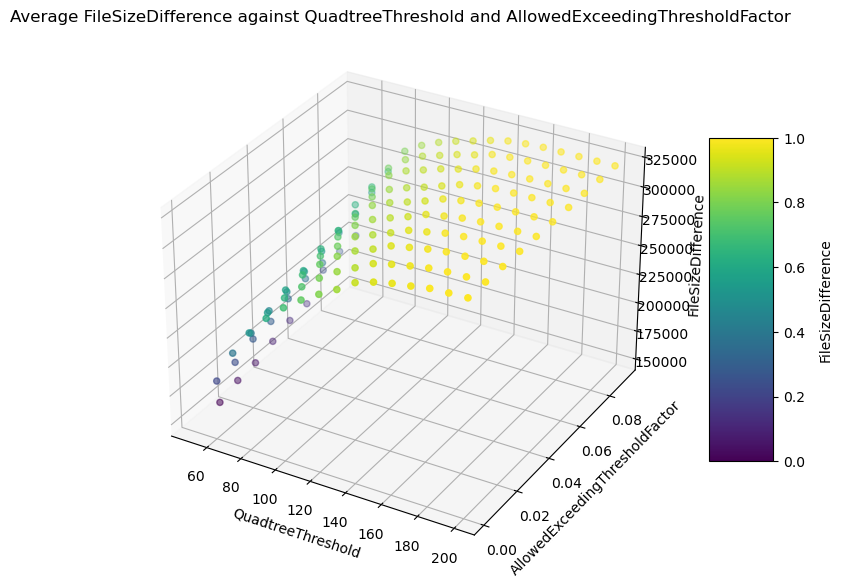

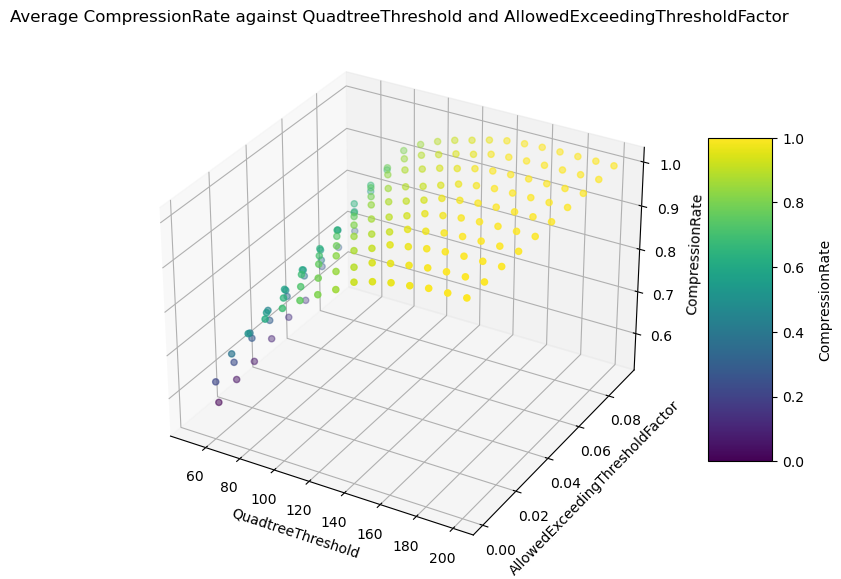

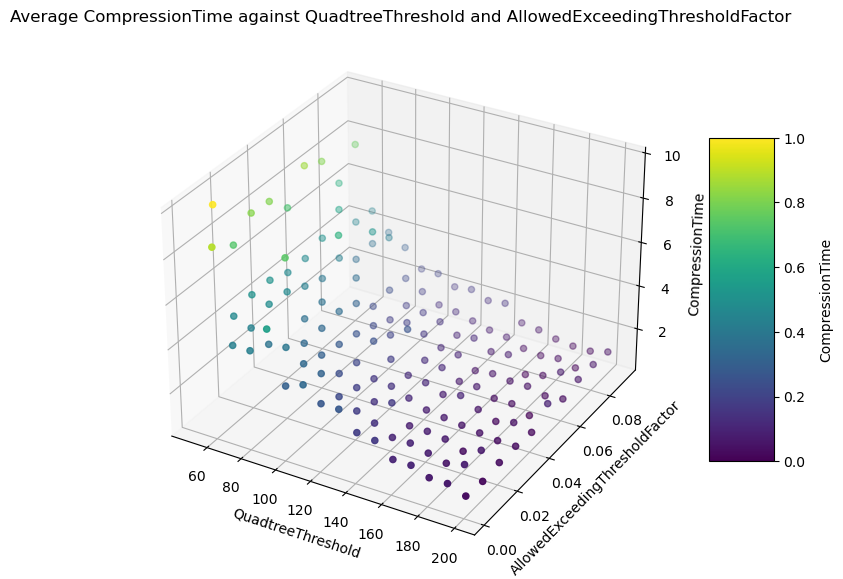

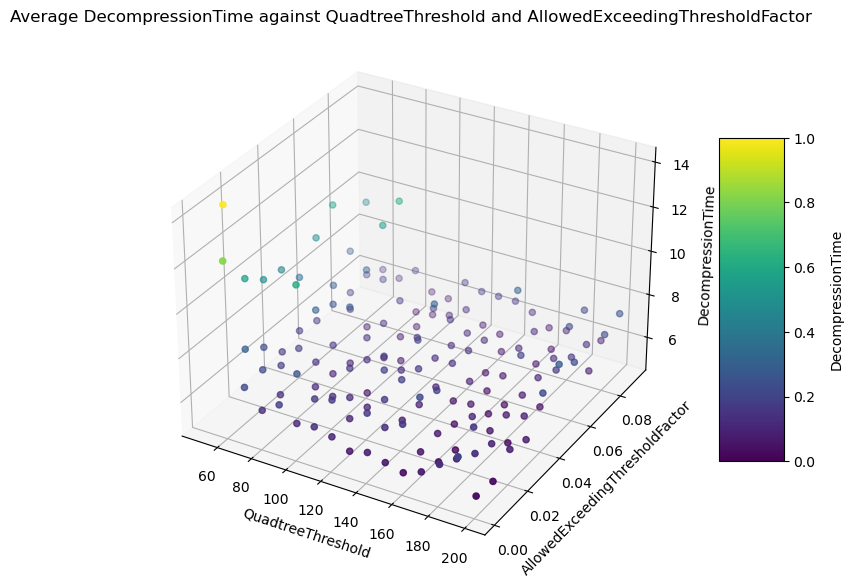

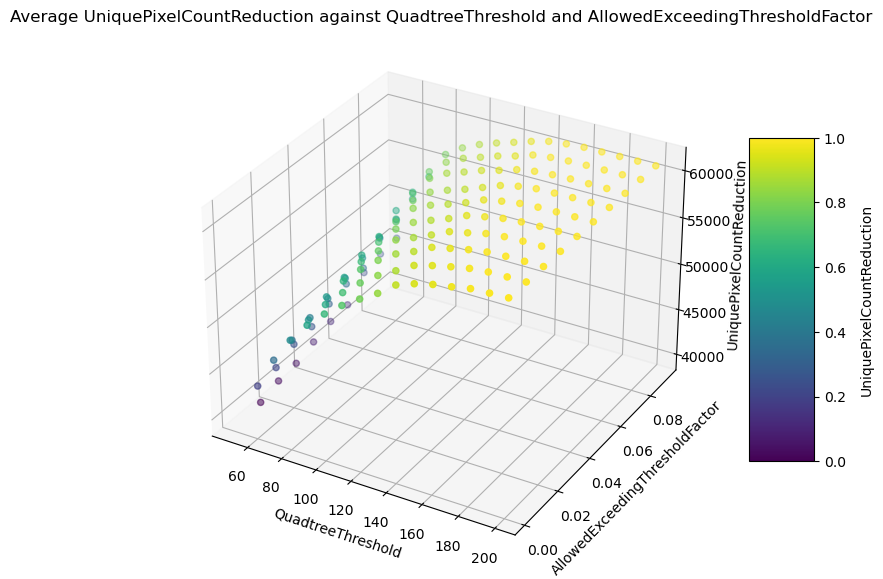

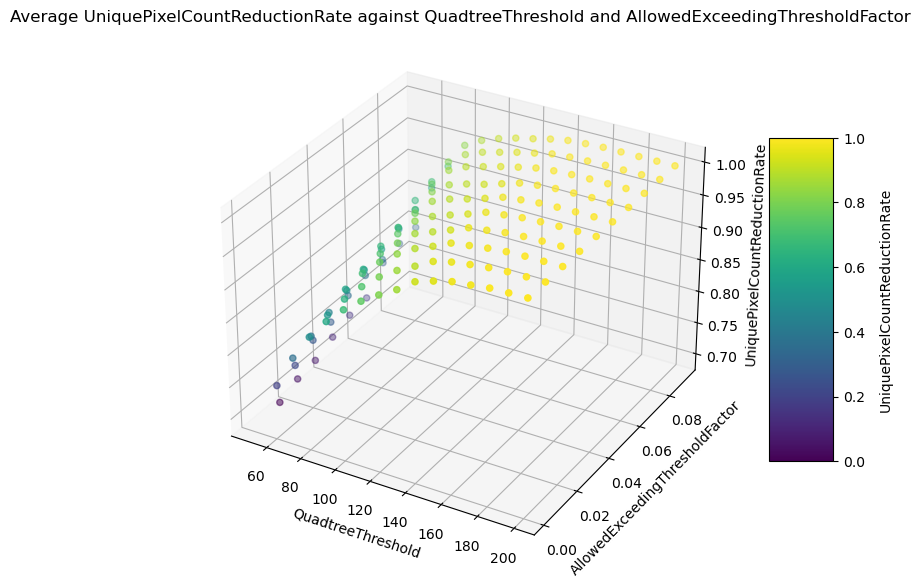

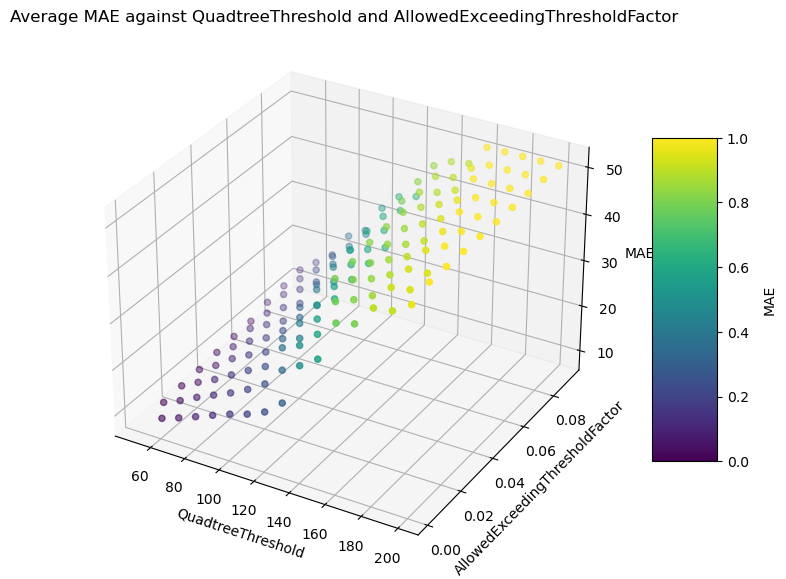

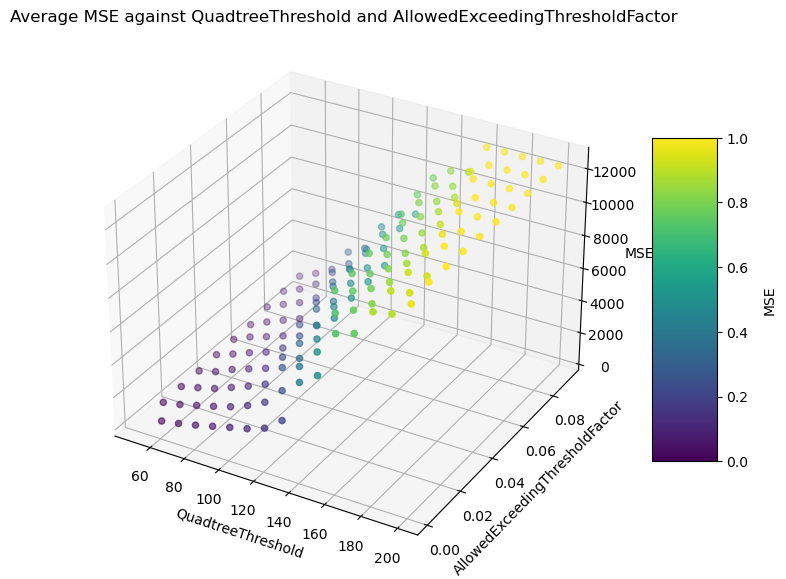

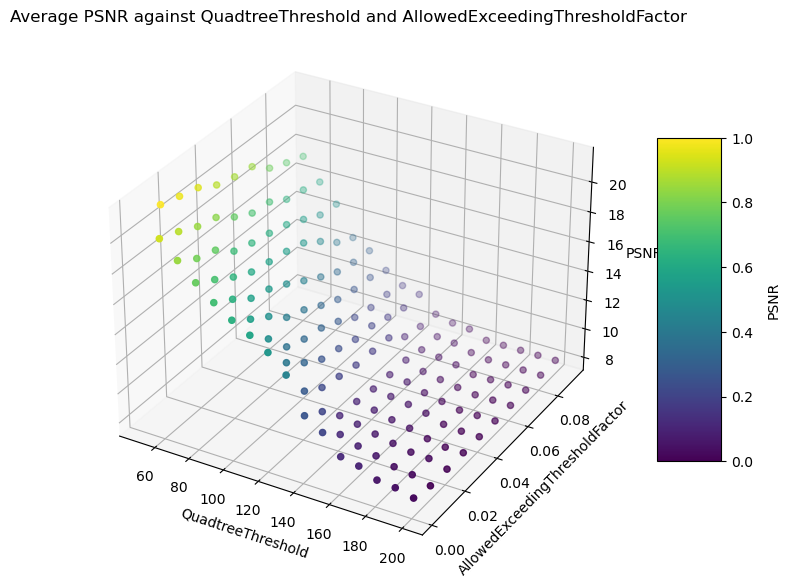

In [9]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


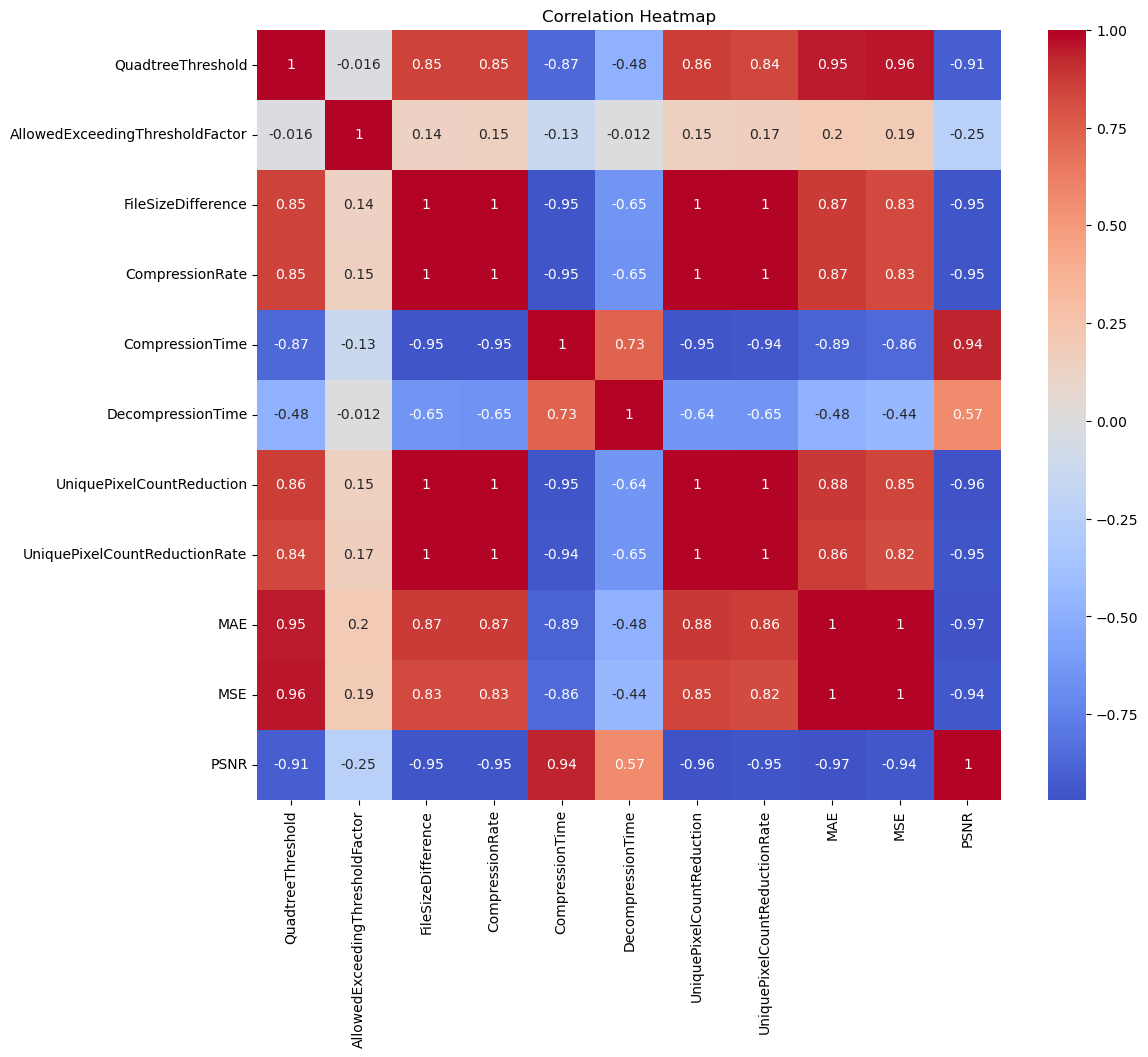

In [16]:
# Calculate the correlation matrix
correlation = data_grouped_by_test[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Score and Evaluation

In [10]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

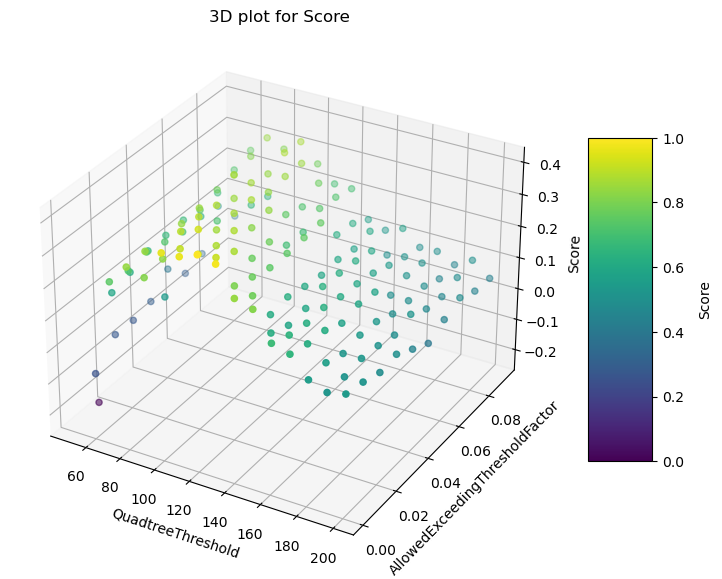

In [11]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

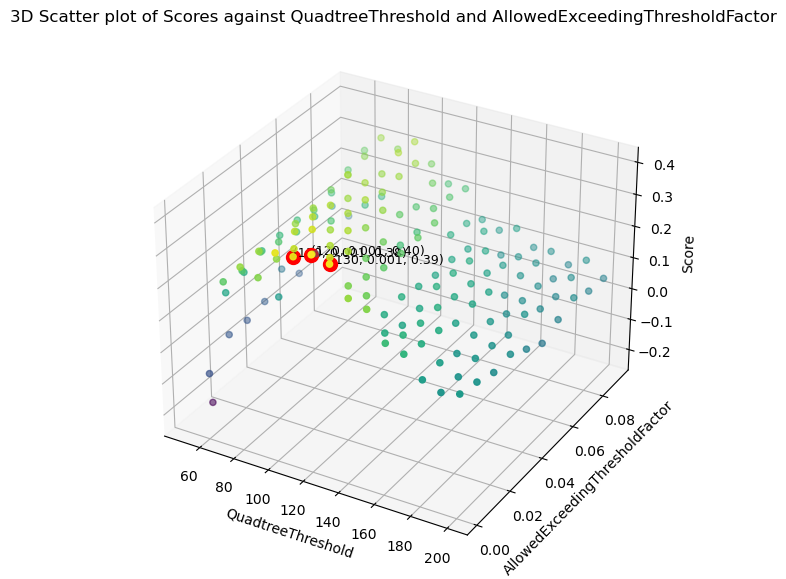

In [12]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [13]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


    QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
69                120                            0.001  0.400657
79                130                            0.001  0.388582
59                110                            0.001  0.379369
